In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'ID Wniosku': np.arange(1, 101),
    'Złożenie Wniosku': np.random.normal(17, 3, 100).astype(int),
    'Weryfikacja Dokumentów': np.random.normal(55, 10, 100).astype(int),
    'Ocena Zdolności Kredytowej': np.random.normal(12, 2, 100).astype(int),
    'Decyzja Kredytowa': np.random.normal(35, 5, 100).astype(int),
    'Powiadomienie Klienta': np.random.normal(7, 2, 100).astype(int)
})

data.to_csv('/mnt/data/generated_credit_data.csv', index=False)

data = pd.read_csv('/mnt/data/generated_credit_data.csv')


In [2]:
data

,ID Wniosku,Złożenie Wniosku,Weryfikacja Dokumentów,Ocena Zdolności Kredytowej,Decyzja Kredytowa,Powiadomienie Klienta
0,1,9,50,10,35,5
1,2,21,54,13,30,8
2,3,12,57,10,32,6
3,4,15,49,13,22,8
4,5,17,63,12,35,6
...,...,...,...,...,...,...
95,96,10,52,12,39,8
96,97,12,55,14,34,8
97,98,14,47,11,37,4
98,99,14,61,12,38,2


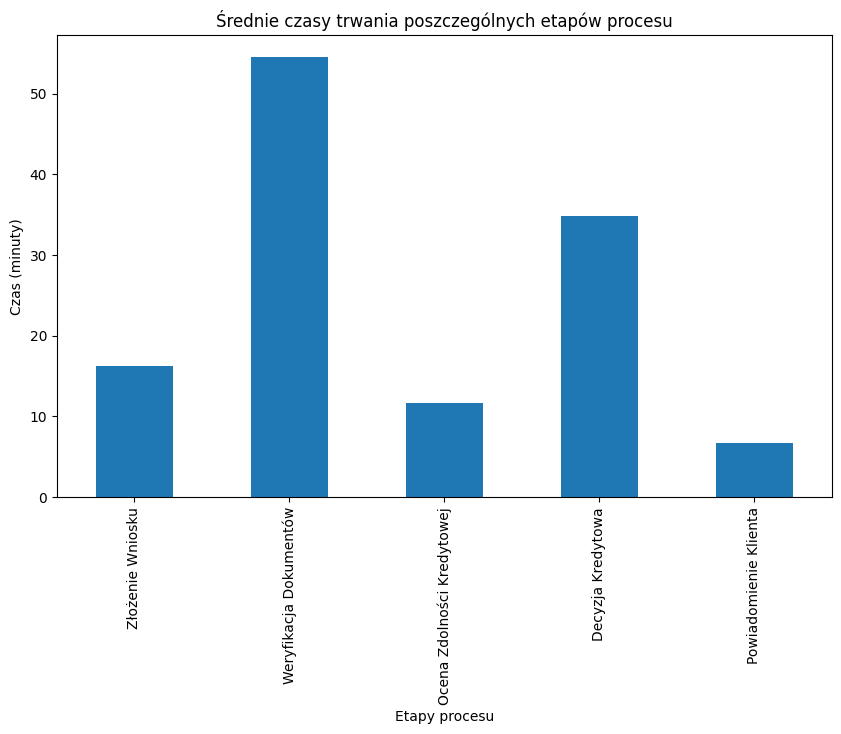

In [9]:

average_times = data.iloc[:,1:].mean()

import matplotlib.pyplot as plt

average_times.plot(kind='bar', figsize=(10, 6))
plt.title('Średnie czasy trwania poszczególnych etapów procesu')
plt.ylabel('Czas (minuty)')
plt.xlabel('Etapy procesu')
plt.show()


In [104]:
class EmployeeCosts:
    def __init__(self, costs):
        self.costs = costs
    
    def total_cost(self):
        return self.costs['Roczny Koszt Pracowników (PLN w tys)'].sum()
    
    def increase_staff_cost(self, department, increase_by):
        additional_cost = self.costs.loc[self.costs['Dział'] == department, 'Średnie Wynagrodzenie Miesięczne (PLN w tys)'].values[0] * 12 * increase_by
        return additional_cost
    
    def increase_staff(self, department, increase_by):
        self.costs.loc[self.costs['Dział'] == department, 'Liczba Pracowników'] += increase_by
        self.costs.loc[self.costs['Dział'] == department, 'Roczny Koszt Pracowników (PLN w tys)'] += \
            self.costs.loc[self.costs['Dział'] == department, 'Średnie Wynagrodzenie Miesięczne (PLN w tys)'].values[0] * 12 * increase_by



In [114]:
class TechnologyCosts:
    def __init__(self, costs):
        self.costs = costs
    
    def total_cost(self):
        return self.costs['Koszt Jednorazowy (PLN w tys)'].sum()
    
    def cost_by_position(self):
        return self.costs[['Pozycja', 'Koszt Jednorazowy (PLN w tys)', 'Redukcja Czasu (%)']]
    
    def apply_technology(self, budget, external_it_budget):
        applied_technologies = []
        total_cost = 0
        total_reduction = 0
        
        for index, row in self.costs.iterrows():
            if total_cost + row['Koszt Jednorazowy (PLN)'] <= budget:
                if 'IT' in row['Pozycja'] and external_it_budget - row['Koszt Jednorazowy (PLN w tys)'] >= 0:
                    external_it_budget -= row['Koszt Jednorazowy (PLN w tys)']
                    total_cost += row['Koszt Jednorazowy (PLN w tys)']
                    applied_technologies.append(row['Pozycja'])
                    total_reduction += row['Redukcja Czasu (%)']
                elif 'IT' not in row['Pozycja']:
                    total_cost += row['Koszt Jednorazowy (PLN w tys)']
                    applied_technologies.append(row['Pozycja'])
                    total_reduction += row['Redukcja Czasu (%)']
        
        return applied_technologies, total_cost, total_reduction



In [115]:
class Optimization:
    def __init__(self, employee_costs, operational_costs, technology_costs, average_times):
        self.employee_costs = EmployeeCosts(employee_costs)
        self.operational_costs = OperationalCosts(operational_costs)
        self.technology_costs = TechnologyCosts(technology_costs)
        self.average_times = average_times
    
    def calculate_new_times(self, staff_increase, department):
        new_times = self.average_times.copy()
        if department == 'Weryfikacja Dokumentów':
            new_times['Weryfikacja Dokumentów'] *= (1 - staff_increase / 100)
        elif department == 'Ocena Zdolności Kredytowej':
            new_times['Ocena Zdolności Kredytowej'] *= (1 - staff_increase / 100)
        elif department == 'Decyzja Kredytowa':
            new_times['Decyzja Kredytowa'] *= (1 - staff_increase / 100)
        return new_times
    
    def calculate_costs(self, staff_increase_strategy):
        total_cost = self.technology_costs.total_cost() + self.operational_costs.total_cost()
        for department, increase_by in staff_increase_strategy.items():
            total_cost += self.employee_costs.increase_staff_cost(department, increase_by)
        return total_cost
    
    def calculate_benefits(self, new_times):
        total_old_time = self.average_times.sum()
        total_new_time = new_times.sum()
        time_saved = total_old_time - total_new_time
        return total_old_time, total_new_time, time_saved
    
    def find_best_increase_strategy(self, max_increase_percentage):
        best_strategy = {}
        best_total_new_time = float('inf')
        best_total_cost = float('inf')
        best_time_saved_per_department = {}

        current_times = self.average_times.copy()
        current_cost = self.calculate_costs({})
        
        for _ in range(max_increase_percentage):
            best_time_reduction = 0
            best_department = None
            for department in ['Weryfikacja Dokumentów', 'Ocena Zdolności Kredytowej', 'Decyzja Kredytowa']:
               
                current_staff = self.employee_costs.costs.loc[self.employee_costs.costs['Dział'] == department, 'Liczba Pracowników'].values[0]
                max_increase = int(current_staff * 0.2)
                if best_strategy.get(department, 0) < max_increase:
                    new_times = self.calculate_new_times(1, department)
                    _, total_new_time, time_saved = self.calculate_benefits(new_times)
                    if time_saved > best_time_reduction:
                        best_time_reduction = time_saved
                        best_department = department
            
            if best_department:
                if best_department in best_strategy:
                    best_strategy[best_department] += 1
                else:
                    best_strategy[best_department] = 1
                
                self.employee_costs.increase_staff(best_department, 1)
                current_times = self.calculate_new_times(1, best_department)
                current_cost = self.calculate_costs(best_strategy)
                
                best_total_new_time = current_times.sum()
                best_total_cost = current_cost
                best_time_saved_per_department[best_department] = best_time_reduction
        
        return best_strategy, best_total_new_time, best_total_cost, best_time_saved_per_department
    
    def apply_technologies(self, budget, external_it_budget):
        applied_technologies, total_technology_cost, total_reduction = self.technology_costs.apply_technology(budget, external_it_budget)
        return applied_technologies, total_technology_cost, total_reduction
    
    def optimize(self, max_increase_percentage, budget, external_it_budget):
        best_strategy, best_total_new_time, best_total_cost, best_time_saved_per_department = self.find_best_increase_strategy(max_increase_percentage)
        applied_technologies, technology_cost, technology_reduction = self.apply_technologies(budget, external_it_budget)
        
        total_old_time = self.average_times.sum()
        total_new_time = best_total_new_time * (1 - technology_reduction / 100)
        time_saved = total_old_time - total_new_time
        
        result = {
            'Total Old Time': total_old_time,
            'Total New Time': total_new_time,
            'Time Saved': time_saved,
            'Total Cost': best_total_cost + technology_cost,
            'Staff Increase Strategy': best_strategy,
            'Time Saved per Department': best_time_saved_per_department,
            'Applied Technologies': applied_technologies,
            'Technology Cost': technology_cost,
            'Detailed Employee Costs': self.employee_costs.costs
        }
        
        return result


In [123]:
employee_cost = pd.read_excel(r"C:\Users\Asus\Desktop\optyamlizacja\optymal.xlsx",sheet_name='kosztypracownikow')

In [124]:
operation_cost = pd.read_excel(r"C:\Users\Asus\Desktop\optyamlizacja\optymal.xlsx", sheet_name='kosztyoperacyjne')

In [175]:
tech_cost = pd.read_excel(r"C:\Users\Asus\Desktop\optyamlizacja\optymal.xlsx", sheet_name='nowetech')

In [176]:
overall = pd.read_excel(r"C:\Users\Asus\Desktop\optyamlizacja\optymal.xlsx", sheet_name='podsumowanie')

In [177]:
employee_df = pd.DataFrame(employee_cost)
operation_df = pd.DataFrame(operation_cost)
tech_df = pd.DataFrame(tech_cost)
overall_df = pd.DataFrame(overall)

In [128]:
average_times_series = pd.Series(average_times)
optymalizacja = Optimization(employee_df, operation_df, tech_df, average_times_series)

In [129]:
result = optymalizacja.optimize(20)

TypeError: Optimization.optimize() missing 2 required positional arguments: 'budget' and 'external_it_budget'

In [116]:
result

{'Total Old Time': 123.91,
 'Total New Time': 123.7938,
 'Time Saved': 0.11619999999999209,
 'Total Cost': 1332.0,
 'Staff Increase Strategy': {'Weryfikacja Dokumentów': 1,
  'Decyzja Kredytowa': 1,
  'Ocena Zdolności Kredytowej': 1},
 'Time Saved per Department': {'Weryfikacja Dokumentów': 0.5454000000000008,
  'Decyzja Kredytowa': 0.34799999999998477,
  'Ocena Zdolności Kredytowej': 0.11619999999999209},
 'Detailed Employee Costs':                         Dział  Liczba Pracowników  \
 0             Obsługa Klienta                  10   
 1      Weryfikacja Dokumentów                   9   
 2  Ocena Zdolności Kredytowej                   6   
 3           Decyzja Kredytowa                   7   
 4       IT (obsługa systemów)                   4   
 5       Powiadomienie Klienta                   2   
 6                       Razem                  35   
 
    Średnie Wynagrodzenie Miesięczne (PLN w tys)  \
 0                                           6.0   
 1                       

In [178]:
budget = 200  
external_it_budget = 50  


class TechnologyCosts:
    def __init__(self, costs):
        self.costs = costs
    
    def apply_technology(self, budget, external_it_budget):
        applied_technologies = []
        total_cost = 0
        total_reduction = 0
        
        for index, row in self.costs.iterrows():
            if total_cost + row['Koszt Jednorazowy (PLN w tys)'] <= budget:
                if 'IT' in row['Pozycja'] and external_it_budget - row['Koszt Jednorazowy (PLN w tys)'] >= 0:
                    external_it_budget -= row['Koszt Jednorazowy (PLN w tys)']
                    total_cost += row['Koszt Jednorazowy (PLN w tys)']
                    applied_technologies.append(row['Pozycja'])
                    total_reduction += row['Redukcja Czasu (%)']
                elif 'IT' not in row['Pozycja']:
                    total_cost += row['Koszt Jednorazowy (PLN w tys)']
                    applied_technologies.append(row['Pozycja'])
                    total_reduction += row['Redukcja Czasu (%)']
        
        return applied_technologies, total_cost, total_reduction

technology_costs = TechnologyCosts(tech_df)
applied_technologies, total_technology_cost, total_reduction = technology_costs.apply_technology(budget, external_it_budget)

print(f"Remaining External IT Budget: {external_it_budget} tys. PLN")

new_average_times = average_times_series * (1 - total_reduction / 100)


general_result = {
    'Applied Technologies': [applied_technologies],
    'Total Technology Cost (PLN w tys)': [total_technology_cost],
    'Total Reduction (%)': [total_reduction]
}

times_result = {
    'Old Average Times': average_times_series,
    'New Average Times': new_average_times
}

general_result_df = pd.DataFrame(general_result)
times_result_df = pd.DataFrame(times_result)

print("General Results:")
print(general_result_df)
print("\nDetailed Times Results:")
print(times_result_df)

Remaining External IT Budget: 50 tys. PLN
General Results:
                    Applied Technologies  Total Technology Cost (PLN w tys)  \
0  [Szkolenie z Obsługi Nowych Systemów]                                200   

   Total Reduction (%)  
0                  2.0  

Detailed Times Results:
                            Old Average Times  New Average Times
Złożenie Wniosku                         17.0              16.66
Weryfikacja Dokumentów                   55.0              53.90
Ocena Zdolności Kredytowej               12.0              11.76
Decyzja Kredytowa                        35.0              34.30
Powiadomienie Klienta                     7.0               6.86


In [146]:
results = {
    'Total Old Time': 123.91, 
    'Total New Time': 123.7938,
    'Time Saved': 0.11619999,
    'Total Cost': 252,
    'Time Saved per Department': {
        'Weryfikacja Dokumentów': 0.55,
        'Decyzja Kredytowa': 0.35,
        'Ocena Zdolności Kredytowej': 0.12
    }
}

general_results = {
    'Metric': ['Total Old Time', 'Total New Time', 'Time Saved', 'Total Cost'],
    'Value': [results['Total Old Time'], results['Total New Time'], results['Time Saved'], results['Total Cost']]
}
general_results_df = pd.DataFrame(general_results)

department_results = {
    'Department': list(results['Time Saved per Department'].keys()),
    'Time Saved': list(results['Time Saved per Department'].values())
}
department_results_df = pd.DataFrame(department_results)

print("General Results:")
print(general_results_df)
print("\nDepartment Results:")
print(department_results_df)
with pd.ExcelWriter("Optimization_Results.xlsx") as writer:
    general_results_df.to_excel(writer, sheet_name="General Results", index=False)
    department_results_df.to_excel(writer, sheet_name="Department Results", index=False)


general_results_df.to_csv("General_Results.csv", index=False)
department_results_df.to_csv("Department_Results.csv", index=False)

General Results:
           Metric     Value
0  Total Old Time  123.9100
1  Total New Time  123.7938
2      Time Saved    0.1162
3      Total Cost  252.0000

Department Results:
                   Department  Time Saved
0      Weryfikacja Dokumentów        0.55
1           Decyzja Kredytowa        0.35
2  Ocena Zdolności Kredytowej        0.12


Staff Reduction Analysis:
                   Department  Current Staff  Potential Reduction  \
0      Weryfikacja Dokumentów              8                    5   
1  Ocena Zdolności Kredytowej              5                    3   
2           Decyzja Kredytowa              6                    3   
3       Powiadomienie Klienta              2                    1   

   Remaining Staff  
0                3  
1                2  
2                3  
3                1  


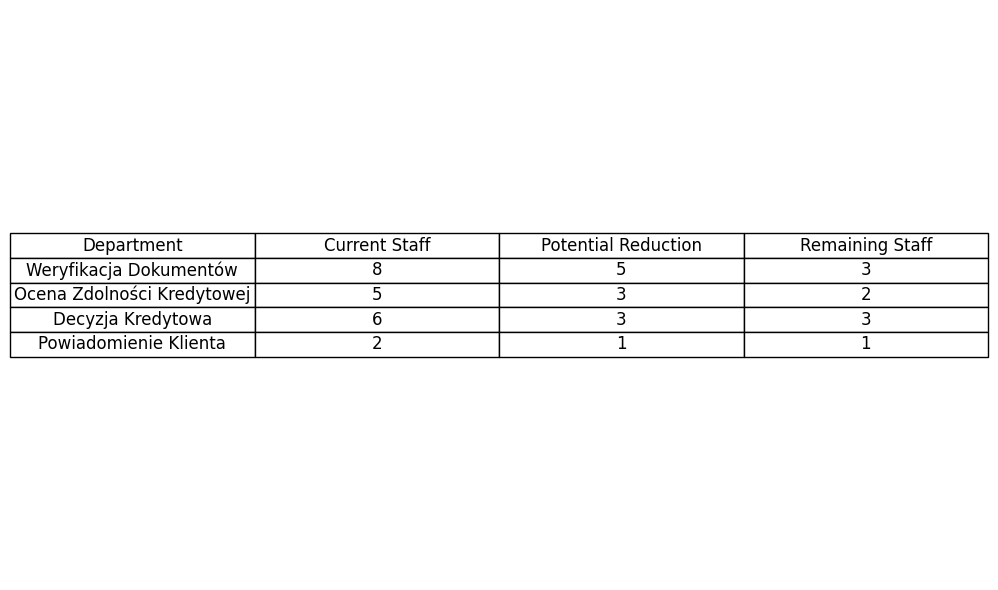

In [172]:
import matplotlib.pyplot as plt

employee_costs_data = {
    'Dział': ['Obsługa Klienta', 'Weryfikacja Dokumentów', 'Ocena Zdolności Kredytowej', 'Decyzja Kredytowa', 'IT', 'Powiadomienie Klienta'],
    'Liczba Pracowników': [10, 8, 5, 6, 4, 2],
    'Średnie Wynagrodzenie Miesięczne (PLN)': [6000, 6500, 7000, 7500, 8000, 5500],
    'Roczny Koszt Pracowników (PLN)': [720000, 624000, 420000, 540000, 384000, 132000]
}
employee_costs_df = pd.DataFrame(employee_costs_data)

times_data = {
    'Process': ['Złożenie Wniosku', 'Weryfikacja Dokumentów', 'Ocena Zdolności Kredytowej', 'Decyzja Kredytowa', 'Powiadomienie Klienta'],
    'Old Average Times': [16.27, 54.54, 11.62, 34.80, 6.68],
    'New Average Times': [5.6945, 19.0890, 4.0670, 12.1800, 2.3380]
}
times_df = pd.DataFrame(times_data)

def calculate_staff_reduction(employee_costs_df, times_df):
    staff_reduction = []
    for index, row in times_df.iterrows():
        process = row['Process']
        old_time = row['Old Average Times']
        new_time = row['New Average Times']
        
        
        department_row = employee_costs_df.loc[employee_costs_df['Dział'] == process]
        if not department_row.empty:
            current_staff = department_row['Liczba Pracowników'].values[0]
            time_reduction_ratio = (old_time - new_time) / old_time
            
           
            potential_reduction = int(current_staff * time_reduction_ratio)
            staff_reduction.append({
                'Department': process,
                'Current Staff': current_staff,
                'Potential Reduction': potential_reduction,
                'Remaining Staff': current_staff - potential_reduction
            })
    
    return pd.DataFrame(staff_reduction)


staff_reduction_df = calculate_staff_reduction(employee_costs_df, times_df)


print("Staff Reduction Analysis:")
print(staff_reduction_df)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=staff_reduction_df.values, colLabels=staff_reduction_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig("staff_reduction_analysis.png")
plt.show()

Staff Reduction Analysis:
                   Department  Current Staff  Potential Reduction  \
0            Złożenie Wniosku             10                    3   
1      Weryfikacja Dokumentów              8                    2   
2  Ocena Zdolności Kredytowej              5                    1   
3           Decyzja Kredytowa              6                    2   
4       Powiadomienie Klienta              2                    0   

   Remaining Staff  
0                7  
1                6  
2                4  
3                4  
4                2  


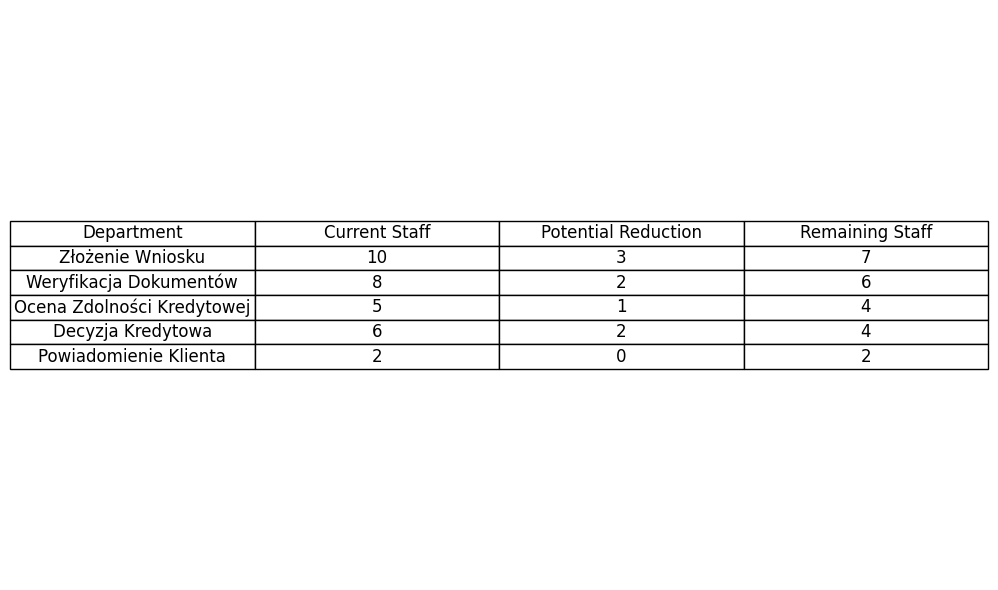

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

employee_costs_data = {
    'Dział': ['Złożenie Wniosku', 'Weryfikacja Dokumentów', 'Ocena Zdolności Kredytowej', 'Decyzja Kredytowa', 'IT', 'Powiadomienie Klienta'],
    'Liczba Pracowników': [10, 8, 5, 6, 4, 2],
    'Średnie Wynagrodzenie Miesięczne (PLN)': [6000, 6500, 7000, 7500, 8000, 5500],
    'Roczny Koszt Pracowników (PLN)': [720000, 624000, 420000, 540000, 384000, 132000]
}
employee_costs_df = pd.DataFrame(employee_costs_data)

times_data = {
    'Process': ['Złożenie Wniosku', 'Weryfikacja Dokumentów', 'Ocena Zdolności Kredytowej', 'Decyzja Kredytowa', 'Powiadomienie Klienta'],
    'Old Average Times': [16.27, 54.54, 11.62, 34.80, 6.68],
    'New Average Times': [11.05, 35.75, 7.80, 22.75, 4.55]
}
times_df = pd.DataFrame(times_data)

def calculate_staff_reduction(employee_costs_df, times_df):
    staff_reduction = []
    for index, row in times_df.iterrows():
        process = row['Process']
        old_time = row['Old Average Times']
        new_time = row['New Average Times']
        
       
        department_row = employee_costs_df.loc[employee_costs_df['Dział'] == process]
        if not department_row.empty:
            current_staff = department_row['Liczba Pracowników'].values[0]
            time_reduction_ratio = (old_time - new_time) / old_time
            
        
            potential_reduction = int(current_staff * time_reduction_ratio)
            staff_reduction.append({
                'Department': process,
                'Current Staff': current_staff,
                'Potential Reduction': potential_reduction,
                'Remaining Staff': current_staff - potential_reduction
            })
    
    return pd.DataFrame(staff_reduction)


staff_reduction_df = calculate_staff_reduction(employee_costs_df, times_df)

print("Staff Reduction Analysis:")
print(staff_reduction_df)


fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=staff_reduction_df.values, colLabels=staff_reduction_df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig("staff_reduction_analysis.png")
plt.show()


In [180]:
times_data = {
    'Process': ['Złożenie Wniosku', 'Weryfikacja Dokumentów', 'Ocena Zdolności Kredytowej', 'Decyzja Kredytowa', 'Powiadomienie Klienta'],
    'Old Average Times': [17, 55, 12, 35, 7],
    'New Average Times': [5.95, 19.25, 4.2, 12.25, 2.45]
}
times_df = pd.DataFrame(times_data)


In [181]:
def sensitivity_analysis(employee_costs_df, times_df, reduction_changes):
    sensitivity_results = []
    for change in reduction_changes:
        new_times_df = times_df.copy()
        new_times_df['New Average Times'] = new_times_df['Old Average Times'] * (1 - change / 100)
        staff_reduction_df = calculate_staff_reduction(employee_costs_df, new_times_df)
        total_reduction = staff_reduction_df['Potential Reduction'].sum()
        sensitivity_results.append({
            'Reduction Change (%)': change,
            'Total Staff Reduction': total_reduction
        })
    
    return pd.DataFrame(sensitivity_results)

In [182]:
reduction_changes = np.arange(5, 55, 5)

In [183]:
sensitivity_results_df = sensitivity_analysis(employee_df, times_df, reduction_changes)


print("Sensitivity Analysis Results:")
print(sensitivity_results_df)

Sensitivity Analysis Results:
   Reduction Change (%)  Total Staff Reduction
0                     5                      0
1                    10                      0
2                    15                      1
3                    20                      2
4                    25                      4
5                    30                      4
6                    35                      5
7                    40                      7
8                    45                      7
9                    50                     10


In [1]:
!git push -u origin master

fatal: repository 'https://github.com/nikodemx/CV/tree/master/' not found


In [2]:
!git remote add origin https://github.com/nikodemx/CV.git

error: remote origin already exists.
